## Introduction 

1. This is project about creating personal Logistic regression classifier and Comparing the performance with the model creation using the inbuilt library scikit learn.

2. The dataset for this procject is "Heart Failure Prediction Dataset" downloaded from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

3. The outflow of the project is as:

  a. Overview of the data 

  b. Visualization

  c. Data Processing

  d. Classifier Modeling

  e. Classifier using Scikit learn
  
  f. Comparision and coclustion

#Overview of the data

In [1]:
# Imporiting the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('heart.csv')

In [3]:
#The simple overview of the data is
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Finding a general sense of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Categorical
features_cat = df.select_dtypes(include = ['object'])
for col in features_cat.columns:
  print(col, df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [8]:
#nan
df.isna().sum().sum()

0

In [12]:
#Checking if categorical
feature_num = df.select_dtypes(include = [np.number])
for col in feature_num.columns:
  print(col, len(df[col].unique()))

Age 50
RestingBP 67
Cholesterol 222
FastingBS 2
MaxHR 119
Oldpeak 53
HeartDisease 2


**Observations**

1. 918 samples with zero null 
2. 11 features where 

  a. 1 float - Oldpeak, from above information it looks like non categorical 

  b. 4 int - Age, RestingBP, Cholesterol, FastingBS, MaxHR all are non categorical features

  c. Age, RestingBP, Cholesterol, FastingBS, MaxHR, and Oldpeak are continuous variable

  c. Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope are the categorical features

  d. HeartDisease is the target variable with 0 and 1.

3. Looks like there is no typo in the dataset

# Visualization

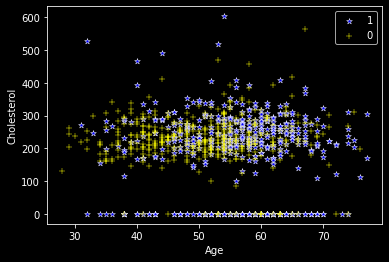

In [ ]:
#Genrel view of target variable the
xydf = df[['Age', 'Cholesterol', 'HeartDisease']]
xy0 = xydf[xydf['HeartDisease'] == 0]
xy1 = xydf[xydf['HeartDisease'] == 1]
sns.scatterplot(x = 'Age', y = 'Cholesterol', data = xy1, marker = '*', color = 'blue', label = '1');
sns.scatterplot(x = 'Age', y = 'Cholesterol', data = xy0, marker = '+', color = 'yellow', label = '0');
plt.show()

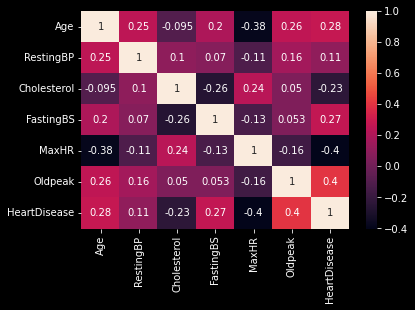

In [ ]:
#Visualizing the relation among numerical features
sns.heatmap(df.corr(), annot = True)

1. There very small co-relation among features like MaxHR slightly decreases with age. 
2. Heart Disease mostly depends on Age, Cholesterol, FastingBP, and MaxHR.

In [ ]:
#Visualizing Categoriacal features
categories = df.select_dtypes(include='object')
categories.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for col in categories.columns:
  print(col, categories[col].value_counts(), '\n')


Sex M    725
F    193
Name: Sex, dtype: int64 

ChestPainType ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

RestingECG Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

ExerciseAngina N    547
Y    371
Name: ExerciseAngina, dtype: int64 

ST_Slope Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



1. There are more samples corresponding to Male compared to Females.
2. 547 people out of 918 (arround 60 % people) do not do exercise.

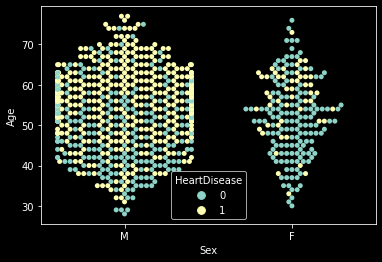

In [ ]:
# Let us see if there is any relation of sex, and age with Heart disease
sns.swarmplot(x='Sex', y='Age', hue = 'HeartDisease', data = df);
plt.show()

1. Look like Male have more heart problem than female and the tendency of having heart disease increases with age.

2. Female mostly get heart disease after 50 but the chance of getting heart disease in male starts even after 40.

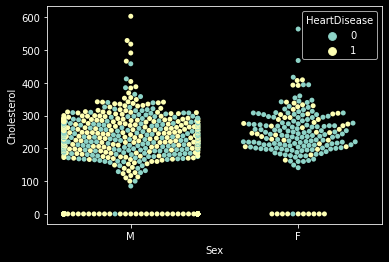

In [ ]:
# Let us see if there is any relation of sex, and age with Heart disease
sns.swarmplot(x='Sex', y='Cholesterol', hue = 'HeartDisease', data = df);
plt.show();

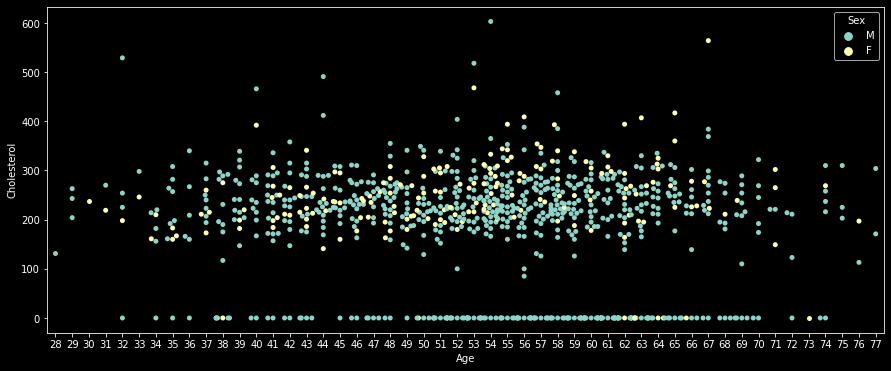

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.swarmplot(x='Age', y='Cholesterol', hue = 'Sex', data = df);
plt.show();

1. Male and Female both have arround same amount of Cholesterol which between 200 and 300.
2. Male and Female both have arround same amount of Cholesterol irrespective of the age after 40.

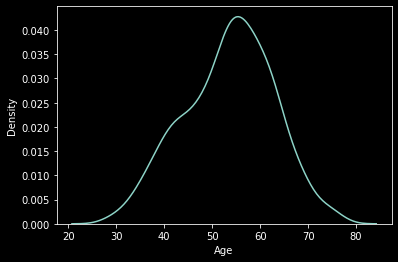

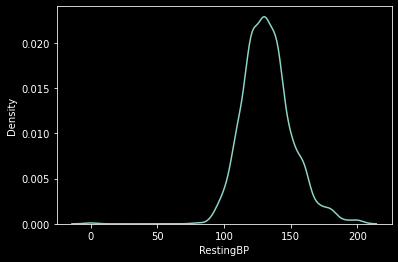

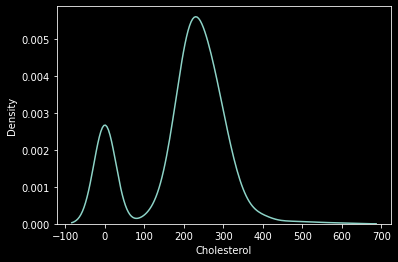

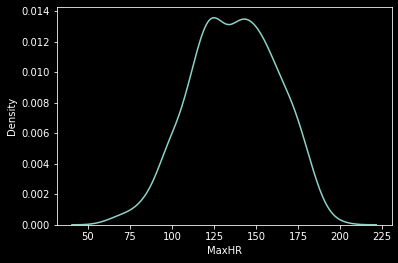

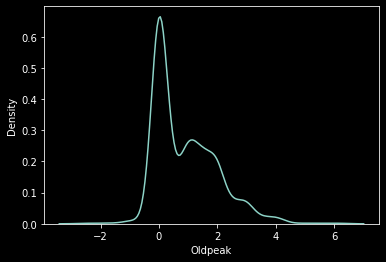

In [ ]:
# Distribution of Continuous Variables
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
  sns.kdeplot(df[col]);
  plt.show()
  print('\n')

None of the continuous variables are highly skewed. Therefore, no log transformation will be required.

# Data Processing 

In [ ]:
# Separating the features and Target
target = df['HeartDisease']
features = df.drop('HeartDisease', axis = 1)
features.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
# Encoding the categorical variables

##Every column having more than two unique values will be splitted in the number of values that column have
def LabelEncoder(df, col):
  unique_values = list(df[col].unique())
  for value in unique_values:
    column = col + '_' + value
    df[column] = df[col].apply(lambda x : 1 if x == value else 0)
  df.drop(col, axis  = 1, inplace = True)
  return(df)

for col in ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex']:
  features = LabelEncoder(features, col)

#Encoding ExercisAngina
features['ExerciseAngina'] = features['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)
features.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,Sex_M,Sex_F
0,40,140,289,0,172,0,0.0,1,0,0,0,1,0,0,1,0,0,1,0
1,49,160,180,0,156,0,1.0,0,1,0,0,1,0,0,0,1,0,0,1
2,37,130,283,0,98,0,0.0,1,0,0,0,0,1,0,1,0,0,1,0
3,48,138,214,0,108,1,1.5,0,0,1,0,1,0,0,0,1,0,0,1
4,54,150,195,0,122,0,0.0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
#Trasnformation of continuous variables
def scalar(df, col):
  max = df[col].max()
  min = df[col].min()
  range = max - min
  df[col] = (df[col] - min)/range
  return(df)

for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
  scalar(features, col)

features.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,Sex_M,Sex_F
0,0.244898,0.70,0.479270,0,0.788732,0,0.295455,1,0,0,0,1,0,0,1,0,0,1,0
1,0.428571,0.80,0.298507,0,0.676056,0,0.409091,0,1,0,0,1,0,0,0,1,0,0,1
2,0.183673,0.65,0.469320,0,0.267606,0,0.295455,1,0,0,0,0,1,0,1,0,0,1,0
3,0.408163,0.69,0.354892,0,0.338028,1,0.465909,0,0,1,0,1,0,0,0,1,0,0,1
4,0.530612,0.75,0.323383,0,0.436620,0,0.295455,0,1,0,0,1,0,0,1,0,0,1,0


The features having continuous values are scaled are between 0 and 1.
The features having categorical values are ecnoded with 0 and 1.
Now the dataset is ready for preparing the model.



# Classifier Modeling

## Coverting the data into matrix form for performing the mathematical operations

It is known that the hypothesis function for Logistic regression classifier is

  $ h(X) = \frac{1}{1 + e^{-Z}}$, where $Z$ = $X\theta$

Let the dataset has $m$ features and $n$ samples then,

  1. $h(X)$ -> Vector of size $n$
  2. $\theta$ is a constant vector with $m+1$ co-ordinates
  3. $Z$ -> Vector of size $n$
  4. $X$ is the features matrix where the first column has entry 1 in every row therefore the size of $X$ is $n \times (m+1)$

In [ ]:
n = features.shape[0] #number of samples
m = features.shape[1] #number of features
features_mat = features.to_numpy() 
X = np.hstack((np.ones((n, 1)), features_mat)) #adding column of 1
print("X", "\n", X[0:3, :])

Y = target.to_numpy()
print("Y", '\n', Y[:10])

X 
 [[1.         0.24489796 0.7        0.47927032 0.         0.78873239
  0.         0.29545455 1.         0.         0.         0.
  1.         0.         0.         1.         0.         0.
  1.         0.        ]
 [1.         0.42857143 0.8        0.29850746 0.         0.67605634
  0.         0.40909091 0.         1.         0.         0.
  1.         0.         0.         0.         1.         0.
  0.         1.        ]
 [1.         0.18367347 0.65       0.46932007 0.         0.26760563
  0.         0.29545455 1.         0.         0.         0.
  0.         1.         0.         1.         0.         0.
  1.         0.        ]]
Y 
 [0 1 0 1 0 0 0 0 1 0]


### Splittig the data for train and test

In [ ]:
ntrain = round(0.8*n) #test_size = 0.2
xtrain = X[0:ntrain, :]  
xtest = X[ntrain:n+1,:]

ytrain = Y[0:ntrain] 
ytest = Y[ntrain:]

In [ ]:
np.size(ytrain)

734

## Functions involved in classifier

1. Hypothesis function: $h(x) = \frac{1}{1 + e^{-z}}$ --> predicted value
2. $Z = X\theta$
3. Cost Function: $J(\theta) = -\frac{1}{n}[log(1 - h(x)) + yz]$, where $y$ is actual value
4. As the minimization of the cost function is not a simple function, either Newton Raphson or the gredient descent method would be used to solve.
5. Gredient function: $\nabla _\theta J(\theta) =  x^T(y - h(x))$
6. Getting the optimized theta: $\theta _{new} = \theta _{old} - \eta \{x^T(y-h(x))\}$, where $\eta$ is learing rate

In [ ]:
# Hypothesis function
def sigma(xtrain,theta):
  z = np.matmul(xtrain, theta)
  ze = np.exp(-z)
  hx = 1 / (1 + ze)
  return(z, hx)

#Cost function 
def costf(z,hx,ytrain):
  c1 = np.matmul(ytrain, np.log(hx))
  c2 = np.matmul((1-ytrain), np.log(1-hx))
  cost = -(c1+c2)/n
  return(cost)
  

#Optimization of cost function
def Optimize(xtrain,ytrain,repeat,eta):
  n = np.shape(xtrain)[0]
  theta = np.random.random(np.shape(xtrain)[1]) #initialization of theta
  cost_list = []                           #list of cost calculated for a learning rate for visualizing the variation of cost 
  for i in range(repeat):
    (z, hx) = sigma(xtrain,theta)
    nabla = np.matmul(xtrain.transpose(), (hx-ytrain))/n #the gredient
    theta = theta - eta*nabla
    cost_list.append(costf(z,hx,ytrain))
  return(theta, cost_list)                                                     

#predicting labels
def predict(xtest,theta):
  (z, hx) = sigma(xtest,theta)
  ypred = np.array([1 if x>=0.5 else 0 for x in hx])
  return(ypred)

#Creatig confusion matrix
def creat_cm(ytest,ypred):
  cm = pd.DataFrame(columns=['predicted 0', 'predicted 1'])
  (zero, zeroOne, one, oneZero) = (0,0,0,0)
  for i in range(np.size(ytest)):
    if ytest[i] == 0 and ypred[i] == 0:
      zero = zero + 1
    if ytest[i] == 0 and ypred[i] == 1:
      zeroOne = zeroOne + 1
    if ytest[i] == 1 and ypred[i] == 1:
      one = one + 1
    if ytest[i] == 1 and ypred[i] == 0:
      oneZero = oneZero + 1
  
  cm.loc['Actual 0'] = [zero, zeroOne]
  cm.loc['Actual 1'] = [oneZero, one]
  return(cm)

#the Decision metrics
def metrics(cm):
  metric = {}
  n = cm['predicted 0'].sum() + cm['predicted 1'].sum()
  metric['accuracy'] = (cm['predicted 0'].loc['Actual 0'] + cm['predicted 1'].loc['Actual 1'])/n
  metric['precision'] = (cm['predicted 1'].loc['Actual 1'])/(cm['predicted 1'].loc['Actual 1'] + cm['predicted 1'].loc['Actual 0'])
  metric['recall'] = (cm['predicted 1'].loc['Actual 1'])/(cm['predicted 1'].loc['Actual 1'] + cm['predicted 0'].loc['Actual 1'])
  metric['F-1 Score'] = 2*metric['precision']*metric['recall']/(metric['precision']+metric['recall'])
  return(metric)

#classifier Modeling 
def classifier(xtrain,ytrain,eta_list,xtest,ytest,repeat):
  reports = pd.DataFrame(columns = ['eta', 'accuracy', 'precision', 'recall', 'F-1 Score'])
  predicted_values = pd.DataFrame()
  predicted_values['Actual label'] = ytest
  cost_variation = {}
  theta_variation = {}
  for eta in eta_list:
    (theta, cost_list)  = Optimize(xtrain,ytrain,repeat,eta)
    cost_variation[eta] = cost_list
    theta_variation[eta] = theta
    ypred = predict(xtest,theta)
    predicted_values['label_'+str(eta)] = ypred
    cm = creat_cm(ytest,ypred)
    metric = metrics(cm)
    metric['eta'] = eta
    reports = reports.append(metric, ignore_index=True)
  
  return(cost_variation, reports, predicted_values,theta_variation)

In [ ]:
eta_list = [0.0001, 0.001, 0.01, 0.1]
(cost_variation, reports, predicted_values,theta_variation) = classifier(xtrain, ytrain, eta_list, xtest, ytest, 1000)

In [ ]:
fig = plt.gcf();
fig.set_size_inches(8,6)
for key in cost_variation.keys():
  y = cost_variation[0.01]
  x = list(range(len(y)))
  sns.lineplot(x,y,label=key)
  plt.show()

In [ ]:
reports

,eta,accuracy,precision,recall,F-1 Score
0,0.0001,0.467391,0.467391,1.000000,0.637037
1,0.0010,0.467391,0.467391,1.000000,0.637037
2,0.0100,0.750000,0.700000,0.813953,0.752688
3,0.1000,0.771739,0.755814,0.755814,0.755814


In [ ]:
eta_list = [ 0.001, 0.01, 0.1]
classifier(xtrain,ytrain,xtest,ytest,1000,eta_list)


eta =  0.001 
 {'accuracy': 0.7717391304347826, 'precision': 0.7558139534883721, 'Recall': 0.7558139534883721, 'F-1 Score': 0.755813953488372}
eta =  0.01 
 {'accuracy': 0.7771739130434783, 'precision': 0.7528089887640449, 'Recall': 0.7790697674418605, 'F-1 Score': 0.7657142857142858}
eta =  0.1 
 {'accuracy': 0.7771739130434783, 'precision': 0.7777777777777778, 'Recall': 0.7325581395348837, 'F-1 Score': 0.7544910179640719}


<Figure size 720x432 with 0 Axes>

In [ ]:
def costf(z,hx,ytrain):
  ze = np.exp(z)
  n = np.size(z)
  hxx = 1 / (1 + ze)
  cost = np.sum((np.log(hxx) + np.matmul(ytrain, z))/n)
  return(cost)

In [ ]:
for eta in eta_list:
  print(eta,'\n',theta_variation[eta])

0.0001 
 [0.13349684 0.47694926 0.43077015 0.52900916 0.48727437 0.26937076
 0.23072645 0.00924484 0.61460649 0.50958201 0.82342853 0.29419408
 0.34490218 0.05078802 0.66607007 0.16807083 0.88205953 0.43074446
 0.07643548 0.83354775]
0.001 
 [0.11835009 0.21368097 0.58354663 0.81176857 0.10913029 0.37737561
 0.62274339 0.0669014  0.11756649 0.25770441 0.00958604 0.82504812
 0.19794057 0.57433793 0.44230805 0.47253602 0.446914   0.85548406
 0.20022754 0.21266521]
0.01 
 [-0.85283432  0.18676266 -0.47008446  0.06298485  0.51365889 -0.04134847
  0.8058665   0.46953883 -0.48708716 -0.21609037  0.72749412  0.12102221
  0.20783877  0.34480201  0.65319209 -0.90482245  0.47435321  0.21309659
  0.45313793  0.24421899]
0.1 
 [-0.3409352  -0.05617829 -0.03456318 -0.8920723   1.51032323 -0.90232064
  0.86431808  0.90235451 -0.74694836 -0.1237637   1.23023006  0.3375241
 -0.32851373 -0.22310954 -0.13899839 -1.43491515  1.35586258  0.19553387
  0.38180144 -0.79421407]
1 
 [-0.70686306  0.44682114  0

In [ ]:
reports

,eta,accuracy,precision,recall,F-1 Score
0,0.0001,0.467391,0.467391,1.000000,0.637037
1,0.0010,0.467391,0.467391,1.000000,0.637037
2,0.0100,0.728261,0.666667,0.837209,0.742268
3,0.1000,0.777174,0.758621,0.767442,0.763006


In [ ]:
np.matmul(ytrain,z)

1940.6362736316646

In [ ]:
cost = costf(z,hx,ytrain)

In [ ]:
#Using Scikit learn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
cm = confusion_matrix(ytest, ypred)
report = classification_report(ytest, ypred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
eta_list = [0.1]
(cost_variation, reports, predicted_values,theta_variation) = classifier(xtrain, ytrain, eta_list, xtest, ytest, 1000)

In [ ]:
reports.transpose()

,0
eta,0.100000
accuracy,0.771739
precision,0.755814
recall,0.755814
F-1 Score,0.755814


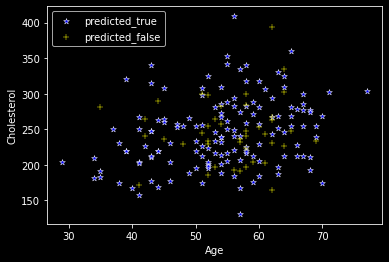

In [ ]:
#Visulaizing the prediction
df_pre = df.iloc[ntrain:]
df_pre = df_pre[['Age', 'Cholesterol']]
df_pre['Actual label'] = list(predicted_values['Actual label'])
df_pre['predicted'] = list(predicted_values['label_0.1'])

true = df_pre[df_pre['Actual label'] == df_pre['predicted']]
false = df_pre[df_pre['Actual label'] != df_pre['predicted']]
sns.scatterplot(x = 'Age', y = 'Cholesterol', data = true, marker = '*', color = 'blue', label = 'predicted_true');
sns.scatterplot(x = 'Age', y = 'Cholesterol', data = false, marker = '+', color = 'yellow', label = 'predicted_false');
plt.show()

In [ ]:
false

,Age,Cholesterol,Actual label,predicted
734,56,283,NaN,NaN
735,49,188,NaN,NaN
736,54,286,NaN,NaN
737,57,274,NaN,NaN
738,65,360,NaN,NaN
...,...,...,...,...
913,45,264,NaN,NaN
914,68,193,NaN,NaN
915,57,131,NaN,NaN
916,57,236,NaN,NaN


In [ ]:
predicted_values

,Actual label,label_0.1
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
179,1,1
180,1,1
181,1,1
182,1,0
